## Loading libraries 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

## Reading Data

In [2]:
data=pd.read_csv("Myntra Fasion Clothing.csv")

In [3]:
data.head(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


### Finding any NULL values present in dataset

In [4]:
data.isnull().any()

URL                      False
Product_id               False
BrandName                False
Category                 False
Individual_category      False
category_by_Gender       False
Description              False
DiscountPrice (in Rs)     True
OriginalPrice (in Rs)    False
DiscountOffer             True
SizeOption               False
Ratings                   True
Reviews                   True
dtype: bool

observation:
    
    
1.In data we are having DiscountPrice (in Rs),DiscountOffer , Ratings and  Reviews having Null values

In [5]:
data.isna().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

## Filling Null values with mean and mode values

In [6]:
## Fill Null values with original values so 0% off
data["DiscountPrice (in Rs)"]=data["DiscountPrice (in Rs)"].fillna(data["OriginalPrice (in Rs)"])

In [7]:
data=data.drop("DiscountOffer",axis=1)

In [8]:
## instead of filling null values just compute offer percentage
data["DiscountOffer"]=round(((data["OriginalPrice (in Rs)"]-data["DiscountPrice (in Rs)"])/data["OriginalPrice (in Rs)"])*100)

In [9]:
data["Ratings"]=data["Ratings"].fillna(data["Ratings"].mean())
data["Reviews"]=data["Reviews"].fillna(data["Reviews"].mode)

In [10]:
data.isna().sum()

URL                      0
Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
DiscountPrice (in Rs)    0
OriginalPrice (in Rs)    0
SizeOption               0
Ratings                  0
Reviews                  0
DiscountOffer            0
dtype: int64

### describing dataset

In [11]:
data.describe()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,DiscountOffer
count,5.265640e+05,526564.000000,526564.000000,526564.000000,526564.000000
mean,1.506939e+07,1528.493978,2414.068615,4.094892,31.205739
std,3.225710e+06,1305.689078,1916.962914,0.297158,28.224426
min,2.739900e+04,99.000000,99.000000,1.000000,0.000000
25%,1.388053e+07,749.000000,1299.000000,4.094892,0.000000
50%,1.597106e+07,1199.000000,1999.000000,4.094892,30.000000
75%,1.734741e+07,1905.000000,2899.000000,4.094892,58.000000
max,1.846435e+07,90000.000000,90000.000000,5.000000,90.000000


In [12]:
data.count()

URL                      526564
Product_id               526564
BrandName                526564
Category                 526564
Individual_category      526564
category_by_Gender       526564
Description              526564
DiscountPrice (in Rs)    526564
OriginalPrice (in Rs)    526564
SizeOption               526564
Ratings                  526564
Reviews                  526564
DiscountOffer            526564
dtype: int64

In [13]:
## find categorical features
catCols = data.select_dtypes("object").columns

In [14]:
catCols

Index(['URL', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'SizeOption', 'Reviews'],
      dtype='object')

In [15]:
## find numerical values in data 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = data.select_dtypes(include=numerics).columns

In [16]:
newdf

Index(['Product_id', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)',
       'Ratings', 'DiscountOffer'],
      dtype='object')

In [17]:
data["Individual_category"].value_counts()

tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
bracelet              1
flip-flops            1
hair-accessory        1
lungi                 1
Name: Individual_category, Length: 92, dtype: int64

In [18]:
data["BrandName"].value_counts()

Pothys                   16005
Roadster                 10935
KALINI                    9589
HERE&NOW                  6515
HRX by Hrithik Roshan     5297
                         ...  
Saart Bunaai                 1
PEONY SMART WORLD            1
Alsace Lorraine Paris        1
ELABORADO                    1
pink woman                   1
Name: BrandName, Length: 2088, dtype: int64

In [21]:
##data.to_csv('preprocessed_myntra.csv', index=False)

In [19]:
data2=data.copy()

### SizeOptions having multiple values in column using Explode we are creating other rows on mulple values

In [20]:
data2["SizeOption"]=data2["SizeOption"].str.split(",")

In [21]:
data2=data2.explode("SizeOption")

In [22]:
data2["SizeOption"].value_counts()

 L                   305232
 XL                  293333
 M                   282177
 XXL                 193211
S                    178226
                      ...  
34G                       1
 UK46" FR54 (L34)         1
 18L                      1
 S7                       1
 MLEF                     1
Name: SizeOption, Length: 1017, dtype: int64

In [23]:
## Replacing L,XL,M,S,XS with values

In [24]:
data2["SizeOption"]=data2["SizeOption"].str.replace("XL",'38')

In [25]:
size = {'L': '36','XL': '38',"M":'32',"S":'28'  }

data2["SizeOption"]=data2["SizeOption"].str.replace("L",'36')
data2["SizeOption"]=data2["SizeOption"].str.replace("S",'30')
data2["SizeOption"]=data2["SizeOption"].str.replace("XS",'28')
data2["SizeOption"]=data2["SizeOption"].str.replace("M",'34')

In [26]:
data2["SizeOption"]=data2["SizeOption"].str.replace("X38",'40')

### Correlation 

In [27]:
data2.corr()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,DiscountOffer
Product_id,1.000000,0.099181,0.078205,0.043862,-0.040624
DiscountPrice (in Rs),0.099181,1.000000,0.756313,-0.000162,-0.372929
OriginalPrice (in Rs),0.078205,0.756313,1.000000,-0.033231,0.199996
Ratings,0.043862,-0.000162,-0.033231,1.000000,-0.052116
DiscountOffer,-0.040624,-0.372929,0.199996,-0.052116,1.000000


Correlation between numerical features


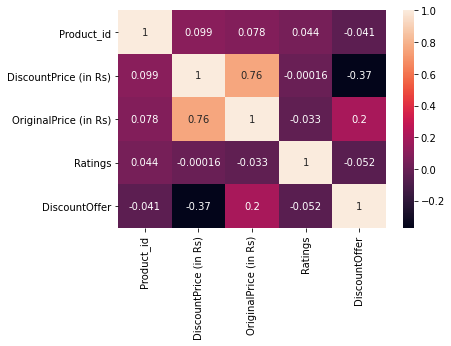

In [28]:
## correlation heatmap
print("Correlation between numerical features")
d=sns.heatmap(data2.corr(),annot=True)

Observation:
    
1.Original price and Discount Price having high correlation 

In [29]:
## finding duplicate values in dataframe
data2.duplicated().sum()

15

In [30]:
## remove duplicate values
data2=data2.drop_duplicates()

In [31]:
data.size

6845332

In [32]:
data2.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'SizeOption', 'Ratings', 'Reviews',
       'DiscountOffer'],
      dtype='object')

In [33]:
## URL,discription features are not very useful so dropping them
data2=data2.drop("URL",axis=1)
data2=data2.drop("Description",axis=1)

In [34]:
data2.head()

,Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),SizeOption,Ratings,Reviews,DiscountOffer
0,2296012,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,28,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,30,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,32,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,34,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,36,3.9,999,45.0


## So our target varible is Ratings

In [35]:
data2["Individual_category"].value_counts()

tshirts           305067
kurtas            213154
tops              190921
dresses           177285
bra               168696
                   ...  
flip-flops             6
jewellery-set          2
bracelet               1
lungi                  1
hair-accessory         1
Name: Individual_category, Length: 92, dtype: int64

In [36]:
data2["Category"].value_counts()

Western                     689621
Indian Wear                 468216
Topwear                     347821
Lingerie & Sleep Wear       334495
Bottom Wear                 305337
Sports Wear                 108041
Plus Size                    80501
Inner Wear &  Sleep Wear     75074
Name: Category, dtype: int64

### Using Label Encoding and One hot encoding ,we are transforming cat feature into numeric feature. 

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
data[""] = ohe.fit_transform(df[['']])

In [38]:
labelencoder = LabelEncoder()
##1=women and 0=men
data2['category_by_Gender']=labelencoder.fit_transform(data2["category_by_Gender"])

In [39]:
#data2['Category']=labelencoder.fit_transform(data2["Category"])

In [40]:
data2["Individual_category"].value_counts()

tshirts           305067
kurtas            213154
tops              190921
dresses           177285
bra               168696
                   ...  
flip-flops             6
jewellery-set          2
bracelet               1
lungi                  1
hair-accessory         1
Name: Individual_category, Length: 92, dtype: int64

In [41]:
data2["Category"].value_counts()

Western                     689621
Indian Wear                 468216
Topwear                     347821
Lingerie & Sleep Wear       334495
Bottom Wear                 305337
Sports Wear                 108041
Plus Size                    80501
Inner Wear &  Sleep Wear     75074
Name: Category, dtype: int64

In [42]:
data2["Individual_category"].value_counts()

tshirts           305067
kurtas            213154
tops              190921
dresses           177285
bra               168696
                   ...  
flip-flops             6
jewellery-set          2
bracelet               1
lungi                  1
hair-accessory         1
Name: Individual_category, Length: 92, dtype: int64

In [ ]:
## Saving preprocessed data in csv format
#data2.to_csv('Prepocessed_myntra.csv', index=False)

In [ ]:
## saving preprocessed data in excel format
#df.to_excel('raw_data.xls', index=False)

In [43]:
data2.head()

,Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),SizeOption,Ratings,Reviews,DiscountOffer
0,2296012,Roadster,Bottom Wear,jeans,0,824.0,1499.0,28,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,0,824.0,1499.0,30,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,0,824.0,1499.0,32,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,0,824.0,1499.0,34,3.9,999,45.0
0,2296012,Roadster,Bottom Wear,jeans,0,824.0,1499.0,36,3.9,999,45.0


In [98]:
data2.to_csv('Prepocessed_myntra.csv', index=False)

In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409106 entries, 0 to 526563
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Product_id             int64  
 1   BrandName              object 
 2   Category               object 
 3   Individual_category    object 
 4   category_by_Gender     int32  
 5   DiscountPrice (in Rs)  float64
 6   OriginalPrice (in Rs)  float64
 7   SizeOption             object 
 8   Ratings                float64
 9   Reviews                object 
 10  DiscountOffer          float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 211.4+ MB


## Our data is too large and  our computational power is less so taking sample of data

We have 3 types of sampling techniques

1.random sampling (data.sample(n=#))
                               
2.sampling with condition # condition = df['sepal width (cm)'] < 3 >> true_index = condition[condition == True].index > subset = df[condition].sample(n = 10)
                               
                               
3.sampling at a constant rate

In [57]:
## this sample method not gives reviews error so above random choice is best way to take sample
data3=data2.sample(n=5000)

In [58]:
data3.head()

,Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),SizeOption,Ratings,Reviews,DiscountOffer
96832,12050562,HERE&NOW,Plus Size,kurtas,1,659.0,2199.0,36,3.700000,18,70.0
463872,15628890,URBANIC,Western,dresses,1,1790.0,1790.0,38,4.094892,<bound method Series.mode of 0 999.0\n...,0.0
191070,16601834,max,Bottom Wear,shorts,0,799.0,799.0,36,4.094892,<bound method Series.mode of 0 999.0\n...,0.0
513764,17661170,itse,Western,dresses,1,1599.0,1599.0,38,4.094892,<bound method Series.mode of 0 999.0\n...,0.0
1180,11296160,Roadster,Western,tops,1,799.0,799.0,38,4.000000,802,0.0


In [59]:
data3["category_by_Gender"].value_counts()

1    3122
0    1878
Name: category_by_Gender, dtype: int64

In [62]:
data3.columns

Index(['Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)',
       'SizeOption', 'Ratings', 'Reviews', 'DiscountOffer'],
      dtype='object')

# EDA

### Scatter Plots

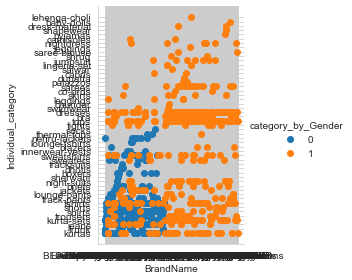

In [65]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.FacetGrid(data3, hue="category_by_Gender", size=4) \
   .map(plt.scatter, "BrandName", "Individual_category") \
   .add_legend();
plt.show();


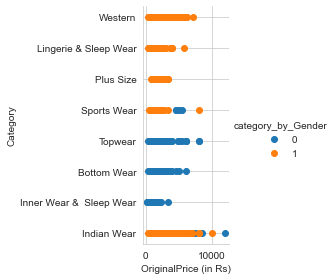

In [66]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.FacetGrid(data3, hue="category_by_Gender", size=4) \
   .map(plt.scatter, "OriginalPrice (in Rs)", "Category") \
   .add_legend();
plt.show();


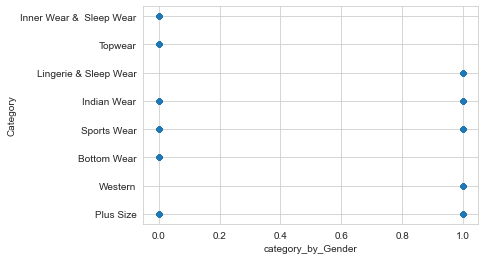

In [51]:
data3.plot(kind='scatter', x='category_by_Gender', y='Category') ;
plt.show()


In [88]:
data3.columns

Index(['Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)',
       'SizeOption', 'Ratings', 'Reviews', 'DiscountOffer'],
      dtype='object')

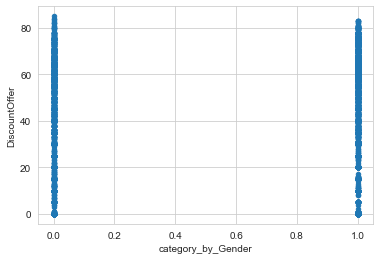

In [52]:
data3.plot(kind='scatter', x='category_by_Gender', y='DiscountOffer') ;
plt.show()


Observation:
    
1.Men gender don't have Western and Lingeria & Sleep Wear category.

2.Women gender don't have Top wear ,Bottom wear and Inner Wear&Sleep wear.

## Pair Plot

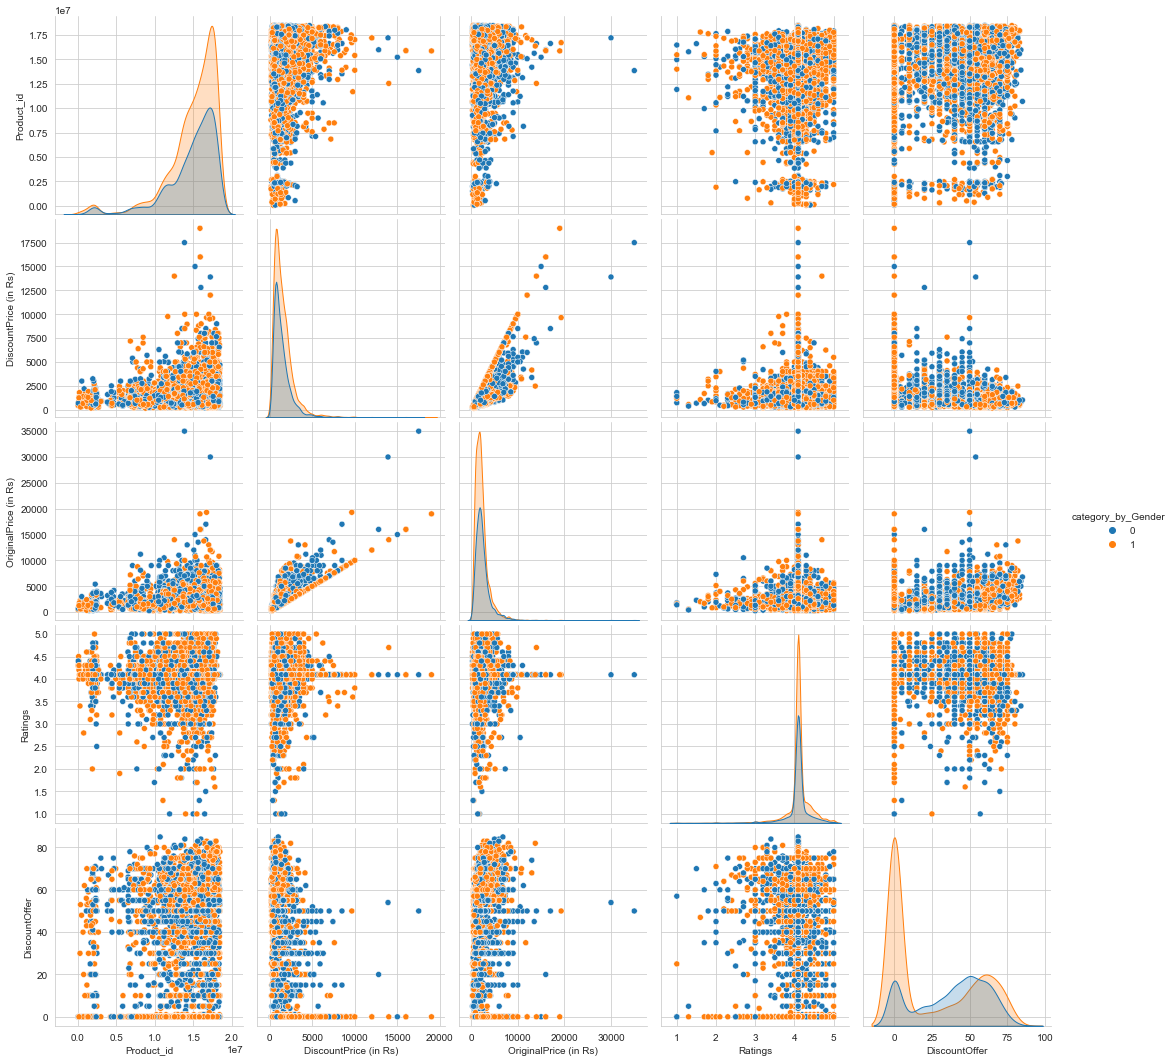

In [53]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data3, hue="category_by_Gender", size=3);
plt.show()

In [ ]:
Observations:
    
1.Original price below 20000 price products having more discount prices.
2.

## Histogram, PDF, CDF

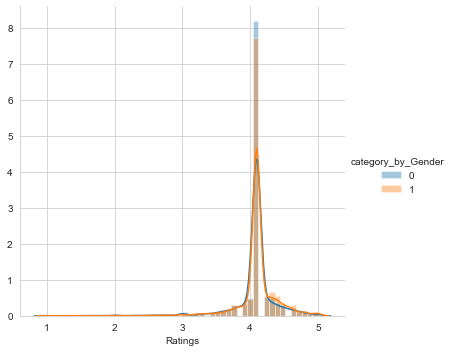

In [54]:
sns.FacetGrid(data3, hue="category_by_Gender", size=5) \
   .map(sns.distplot, "Ratings") \
   .add_legend();
plt.show();



### Statistics 

In [51]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
#print(np.median(data3["DiscountPrice (in Rs)"]))
#Median with an outlier
print(np.median(data3["DiscountPrice (in Rs)"]))
#print(np.median(np.append(data3["DiscountPrice (in Rs)"],50)));
print(np.median(data3["OriginalPrice (in Rs)"]))
print(np.median(data3["Ratings"]))


Medians:
1199.0
1949.0
4.094892128647354


In [52]:
data3.columns

Index(['Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)',
       'SizeOption', 'Ratings', 'Reviews', 'DiscountOffer'],
      dtype='object')

In [53]:
print("\nQuantiles:")
print(np.percentile(data3["DiscountPrice (in Rs)"],np.arange(0, 100, 25)))
print(np.percentile(data3["OriginalPrice (in Rs)"],np.arange(0, 100, 25)))
print(np.percentile(data3["Ratings"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(data3["DiscountPrice (in Rs)"],90))
print(np.percentile(data3["OriginalPrice (in Rs)"],90))
print(np.percentile(data3["Ratings"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(data3["DiscountPrice (in Rs)"]))
print(robust.mad(data3["OriginalPrice (in Rs)"]))
print(robust.mad(data3["Ratings"]))


Quantiles:
[ 199.    749.75 1199.   1899.  ]
[ 199. 1299. 1949. 2699.]
[1.         4.09489213 4.09489213 4.1       ]

90th Percentiles:
2699.0
3999.0
4.4

Median Absolute Deviation
770.2118525136602
963.6914420286413
0.0


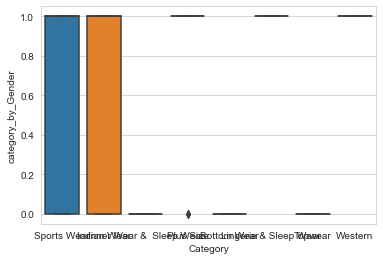

In [67]:
sns.boxplot(x='Category',y='category_by_Gender', data=data3)
plt.show()

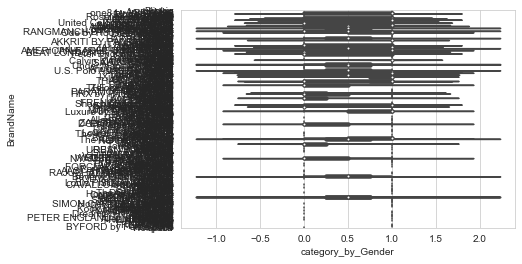

In [68]:
sns.violinplot(x="category_by_Gender", y="BrandName", data=data3, size=8)
plt.show()

In [90]:
data3.iloc[1]

Product_id                                                        17928396
BrandName                                                         BoStreet
Category                                                           Western
Individual_category                                                 shorts
category_by_Gender                                                       1
DiscountPrice (in Rs)                                                 1799
OriginalPrice (in Rs)                                                 1799
SizeOption                                                              34
Ratings                                                            4.09489
Reviews                  <bound method Series.mode of 0         999.0\n...
DiscountOffer                                                            0
Name: 465831, dtype: object

In [64]:
data3["features"] = data['category_by_Gender'] + ' ' +  data['Category'] + '  ' + data['Individual_category'] +  '  ' + data['Description'] 
data3.head()

,Product_id,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),SizeOption,Ratings,Reviews,DiscountOffer,features
96832,12050562,HERE&NOW,Plus Size,kurtas,1,659.0,2199.0,36,3.700000,18,70.0,Women Plus Size kurtas herenow women rust or...
463872,15628890,URBANIC,Western,dresses,1,1790.0,1790.0,38,4.094892,<bound method Series.mode of 0 999.0\n...,0.0,Women Western dresses urbanic women white b...
191070,16601834,max,Bottom Wear,shorts,0,799.0,799.0,36,4.094892,<bound method Series.mode of 0 999.0\n...,0.0,Men Bottom Wear shorts max men black solid s...
513764,17661170,itse,Western,dresses,1,1599.0,1599.0,38,4.094892,<bound method Series.mode of 0 999.0\n...,0.0,Women Western dresses itse pink white flora...
1180,11296160,Roadster,Western,tops,1,799.0,799.0,38,4.000000,802,0.0,Women Western tops roadster rust orange v ne...


<AxesSubplot:>

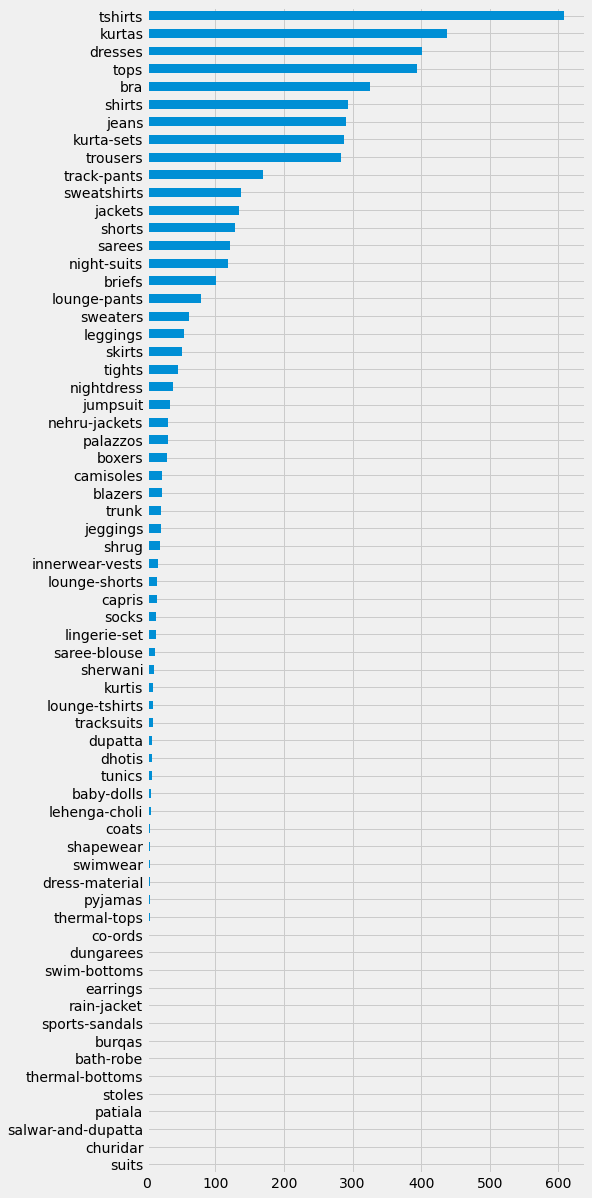

In [67]:

plt.figure(figsize=(7,20))
data3.Individual_category.value_counts().sort_values().plot(kind='barh')